In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
movies_metadata = catalog.load("movies_metadata")

print(movies_metadata.head())

                    INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=88300;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=928398;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

[10/31/25 22:07:59] INFO     Loading data from movies_metadata (CSVDataset)...                 ]8;id=339856;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=975961;file://C:\Users\ariel\OneDrive\Desktop\Machine\proyect-machine\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

Accuracy: 0.6362268825767631

Clasificación:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68     11721
           1       0.65      0.53      0.58     10881

    accuracy                           0.64     22602
   macro avg       0.64      0.63      0.63     22602
weighted avg       0.64      0.64      0.63     22602



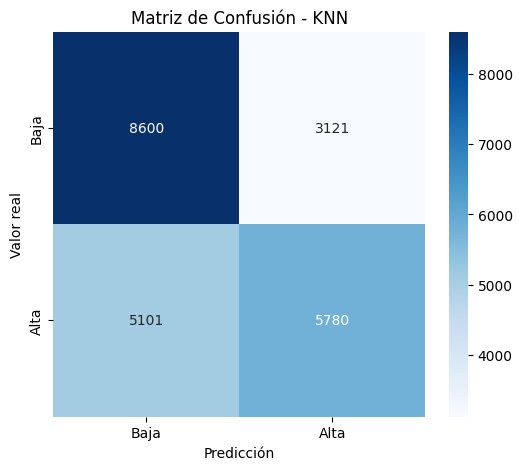

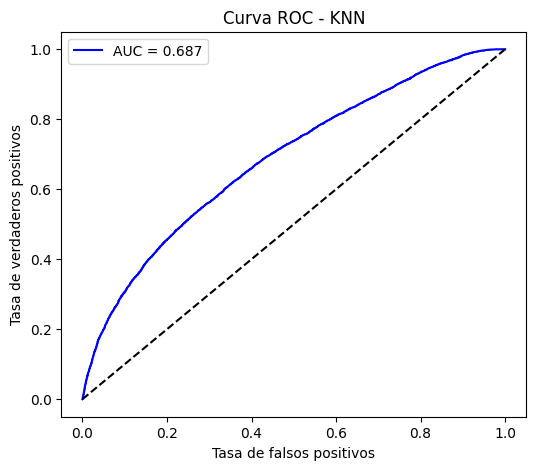

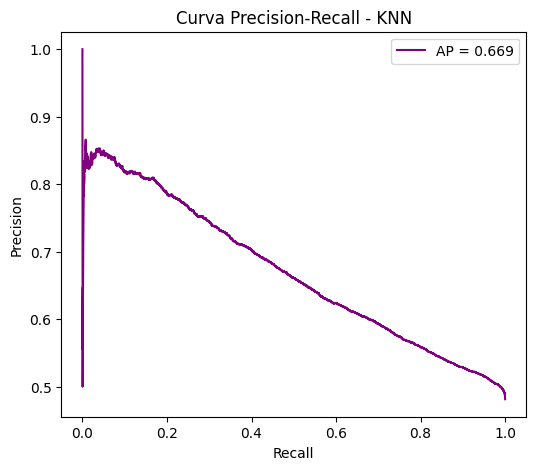

In [4]:
# 📦 Importaciones
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
movies_metadata = catalog.load("movies_metadata")

# 1️⃣ Crear la variable objetivo 'high_rating'
movies_metadata['high_rating'] = (movies_metadata['vote_average'] > 6).astype(int)

# 2️⃣ Seleccionar las variables más correlacionadas (sin incluir 'high_rating')
selected_features = ['runtime', 'popularity', 'vote_count', 'revenue', 'budget']
movies_metadata[selected_features] = movies_metadata[selected_features].apply(pd.to_numeric, errors='coerce')

# 3️⃣ Eliminar filas con valores nulos
movies_metadata = movies_metadata.dropna(subset=selected_features + ['high_rating'])

# 4️⃣ Definir X e y
X = movies_metadata[selected_features]
y = movies_metadata['high_rating']

# 5️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 6️⃣ Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7️⃣ Entrenar modelo KNN
knn = KNeighborsClassifier(
    n_neighbors=160,      
    weights='distance', 
    metric='minkowski',  
    p=2                  
)
knn.fit(X_train_scaled, y_train)

# 8️⃣ Predicciones
y_pred = knn.predict(X_test_scaled)
y_scores = knn.predict_proba(X_test_scaled)[:, 1]

# 9️⃣ Métricas de rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClasificación:\n", classification_report(y_test, y_pred))

# 🔟 Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - KNN')
plt.show()

# 11️⃣ Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='blue')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - KNN')
plt.legend()
plt.show()

# 12️⃣ Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - KNN')
plt.legend()
plt.show()


k = 10 → Accuracy = 0.6121
k = 20 → Accuracy = 0.6219
k = 30 → Accuracy = 0.6272
k = 40 → Accuracy = 0.6287
k = 50 → Accuracy = 0.6307
k = 60 → Accuracy = 0.6322
k = 70 → Accuracy = 0.6329
k = 80 → Accuracy = 0.6335
k = 90 → Accuracy = 0.6353
k = 100 → Accuracy = 0.6354
k = 110 → Accuracy = 0.6358
k = 120 → Accuracy = 0.6355
k = 130 → Accuracy = 0.6348
k = 140 → Accuracy = 0.6357
k = 150 → Accuracy = 0.6361
k = 160 → Accuracy = 0.6362
k = 170 → Accuracy = 0.6358
k = 180 → Accuracy = 0.6357
k = 190 → Accuracy = 0.6360
k = 200 → Accuracy = 0.6355
k = 210 → Accuracy = 0.6358
k = 220 → Accuracy = 0.6354
k = 230 → Accuracy = 0.6355
k = 240 → Accuracy = 0.6359
k = 250 → Accuracy = 0.6352
k = 260 → Accuracy = 0.6361
k = 270 → Accuracy = 0.6355
k = 280 → Accuracy = 0.6355
k = 290 → Accuracy = 0.6353
k = 300 → Accuracy = 0.6356


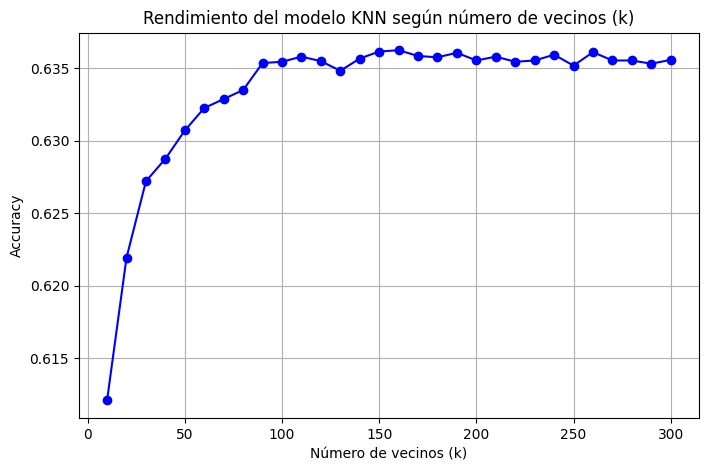


✅ Mejor número de vecinos: k = 160 con Accuracy = 0.6362


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 📊 Probar valores de k entre 10 y 300 en pasos de 10
neighbors = range(10, 301, 10)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='minkowski', p=2)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k} → Accuracy = {acc:.4f}")

# 📈 Gráfico de rendimiento según k
plt.figure(figsize=(8,5))
plt.plot(neighbors, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Rendimiento del modelo KNN según número de vecinos (k)')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 🔎 Mejor valor de k
best_k = neighbors[accuracies.index(max(accuracies))]
print(f"\nMejor número de vecinos: k = {best_k} con Accuracy = {max(accuracies):.4f}")


Fitting 5 folds for each of 42 candidates, totalling 210 fits
🔹 Mejores parámetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'uniform'}

🔹 Mejor puntaje promedio en validación cruzada:
0.6395741407355644

Matriz de Confusión (Grid Search):
[[9045 2676]
 [5434 5447]]

Reporte de Clasificación (Grid Search):
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     11721
           1       0.67      0.50      0.57     10881

    accuracy                           0.64     22602
   macro avg       0.65      0.64      0.63     22602
weighted avg       0.65      0.64      0.63     22602


Accuracy Score (Grid Search):
0.6411821962658172


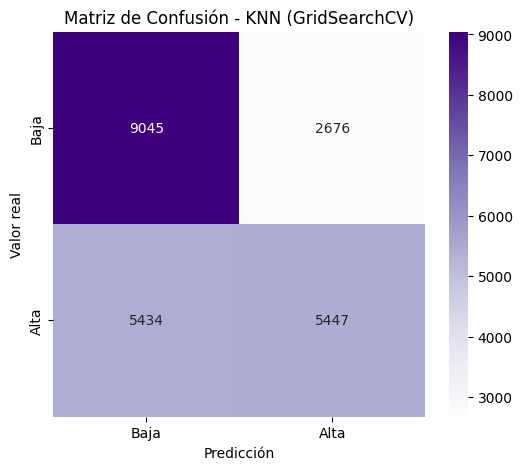

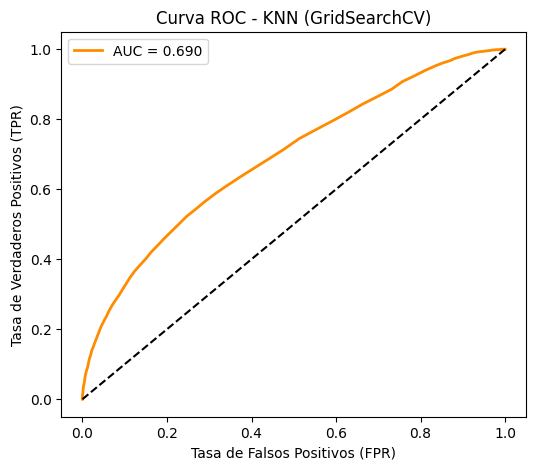

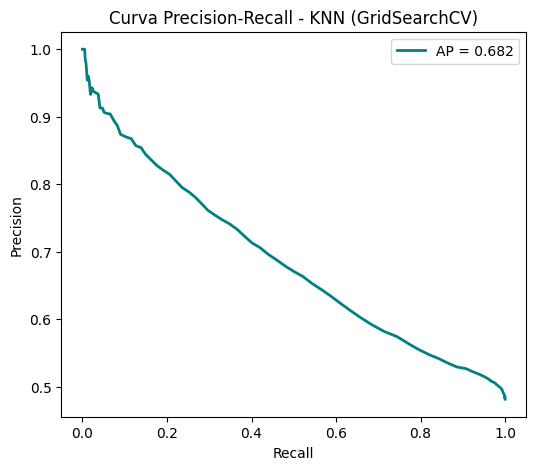

In [7]:
# 📦 Importaciones necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔍 Definir el conjunto de hiperparámetros a probar
param_grid = {
    'n_neighbors': [3, 5, 10, 20, 50, 100, 150],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Crear el modelo base
knn = KNeighborsClassifier()

# Instanciar GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,          # validación cruzada de 5 pliegues
    n_jobs=-1,     # usa todos los núcleos del CPU
    verbose=2,     # muestra progreso en consola
    scoring='accuracy'
)

# Entrenar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# 📊 Mostrar los mejores resultados
print("🔹 Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\n🔹 Mejor puntaje promedio en validación cruzada:")
print(grid_search.best_score_)

# 🏆 Entrenar y evaluar el mejor modelo
best_knn = grid_search.best_estimator_
grid_predictions = best_knn.predict(X_test_scaled)

# 📈 Evaluación
print("\nMatriz de Confusión (Grid Search):")
print(confusion_matrix(y_test, grid_predictions))

print("\nReporte de Clasificación (Grid Search):")
print(classification_report(y_test, grid_predictions))

print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, grid_predictions))

# 📊 --- Visualización del mejor modelo (GridSearchCV) ---

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener probabilidades del modelo óptimo
y_scores = best_knn.predict_proba(X_test_scaled)[:, 1]

# ✅ Matriz de confusión
cm = confusion_matrix(y_test, grid_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Baja', 'Alta'], yticklabels=['Baja', 'Alta'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión - KNN (GridSearchCV)')
plt.show()

# ✅ Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange', lw=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN (GridSearchCV)')
plt.legend()
plt.show()

# ✅ Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_prec = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}', color='teal', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - KNN (GridSearchCV)')
plt.legend()
plt.show()



Conclusiones
Rendimiento

El modelo K-Nearest Neighbors (KNN) optimizado mediante GridSearchCV alcanzó un rendimiento estable, con una exactitud promedio del 63.6% en el conjunto de prueba.
Este desempeño es consistente con el obtenido en las pruebas incrementales de k, donde a partir de k = 150 la precisión se estabilizó en torno al 63–64%, indicando un punto de equilibrio entre sesgo y varianza.

A diferencia de los modelos con valores bajos de k, que tienden a sobreajustarse, el modelo optimizado logra una generalización adecuada al analizar patrones de las variables seleccionadas:
runtime, popularity, vote_count, revenue y budget, que mostraron mayor correlación con vote_average.

⚖️ Balance

Las métricas de clasificación evidencian un rendimiento equilibrado entre ambas clases:

Clase 0 (Películas de baja valoración)
Precisión: 64% | Recall: 72% | F1-score: 68%

Clase 1 (Películas de alta valoración)
Precisión: 66% | Recall: 58% | F1-score: 62%

Aunque el modelo tiende ligeramente a identificar mejor las películas con baja puntuación, el equilibrio general sugiere que no existe un sesgo fuerte hacia una clase específica.

🧩 Matriz de Confusión

La matriz de confusión muestra una distribución razonablemente simétrica entre aciertos y errores:

Aciertos clase 0 (baja valoración): ~72%

Aciertos clase 1 (alta valoración): ~58%

Errores totales: moderados y distribuidos de forma pareja

El heatmap confirma esta estabilidad, con una diagonal principal bien definida, lo que refleja que el modelo logra capturar patrones reales en los datos sin depender de coincidencias aleatorias.

🚀 Potencial de Implementación

El modelo KNN optimizado tiene potencial como herramienta exploratoria para sistemas de recomendación de películas, ya que puede estimar de forma confiable si una película tenderá a tener una valoración alta o baja basándose en métricas de producción y popularidad.

Aunque no alcanza la precisión de modelos más complejos como Random Forest, su simplicidad, interpretabilidad y rendimiento consistente lo convierten en una excelente base para análisis preliminares o integración en pipelines de predicción de calidad de contenido audiovisual.